In [29]:
import pandas as pd

In [24]:
import joblib

# Save the model to a file
joblib.dump(model_path, 'arpit_random_forest_model.pkl')



NameError: name 'model_path' is not defined

In [7]:
import tensorflow as tf

# Load the TensorFlow model
loaded_model = tf.saved_model.load('"C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/saved_model.pb"')


OSError: SavedModel file does not exist at: "C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/saved_model.pb"\{saved_model.pbtxt|saved_model.pb}

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/datasets/extracted_audio_features.csv')
# Display the first few rows of the dataframe
(df.head())

# Check for any missing values
print(df.isnull().sum())


feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
             ..
feature_74    0
feature_75    0
feature_76    0
feature_77    0
label         0
Length: 78, dtype: int64


In [2]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop([ 'label'], axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# df['Formant 1'].fillna(formant1_mean, inplace=True)
# # 

C:\Users\abhis\AppData\Local\Temp\ipykernel_16940\1526382526.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Formant 1'].fillna(formant1_mean, inplace=True)


In [18]:
# print("Missing values after filling:", df['Formant 1'].isnull().sum())


Missing values after filling: 0


In [3]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,label
0,0.157470,2171.167954,2329.723028,0.045476,0.103757,-64.256889,96.851852,-11.936760,26.203243,4.689229,...,0.219290,0.165984,0.137159,0.135227,0.092268,0.067029,0.051616,3.969560e-02,2.846724e-02,1.0
1,0.133341,1668.630949,1742.816018,0.004434,0.085917,-135.004639,130.223633,-33.986973,8.675107,-18.406101,...,0.037862,0.038357,0.041336,0.023678,0.014947,0.007132,0.004563,2.362446e-03,8.841649e-04,1.0
2,0.234371,2533.072510,1275.673432,0.077360,0.210704,-178.597916,16.027376,-136.456635,18.425852,-44.591694,...,0.041195,0.108942,0.047479,0.007817,0.002372,0.002055,0.001931,4.953201e-04,3.415571e-04,1.0
3,0.264092,2687.202391,2077.526094,0.045643,0.156598,-77.908150,61.902889,-54.630146,8.120687,-14.732037,...,1.214409,1.088853,0.607624,0.244218,0.067433,0.030448,0.017889,1.193180e-02,6.328748e-03,1.0
4,0.072383,1677.681458,1023.081466,0.000116,0.113562,-312.050568,149.161362,-111.644440,10.585970,1.295728,...,0.000007,0.000004,0.000003,0.000002,0.000002,0.000001,0.000001,8.171368e-07,4.563053e-07,1.0


In [4]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:/n", classification_report(y_test, y_pred))


KNN Accuracy: 0.8166666666666667
Classification Report:/n               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84        58
         1.0       1.00      0.65      0.78        62

    accuracy                           0.82       120
   macro avg       0.86      0.82      0.81       120
weighted avg       0.87      0.82      0.81       120



In [8]:
from sklearn.svm import SVC

# Initialize the model
svm = SVC(kernel='linear', random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:/n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 1.0
Classification Report:/n               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        58
         1.0       1.00      1.00      1.00        62

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [17]:
# import joblib
# model_path = 'SVM_model.pkl'
# joblib.dump(svm, model_path)
# print(f"Model saved to {model_path}")


Model saved to SVM_model.pkl


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

# Initialize the model
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf1.fit(X_train, y_train)

# Predict on the test data
y_pred_rf1 = rf1.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf1))
print("Classification Report:/n", classification_report(y_test, y_pred_rf1))


Random Forest Accuracy: 1.0
Classification Report:/n               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        58
         1.0       1.00      1.00      1.00        62

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the extracted features and labels from the CSV file
csv_file_path = 'extracted_audio_features.csv'
data = pd.read_csv(csv_file_path)

# Separate features and labels
X = data.drop(columns=['label'])  # Features (all columns except label)
y = data['label']  # Labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        58
         1.0       1.00      1.00      1.00        62

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [11]:
import joblib
model_path = 'final_random_forest_model.pkl'
joblib.dump(rf_classifier, model_path)
print(f"Model saved to {model_path}")


Model saved to final_random_forest_model.pkl


In [19]:
import joblib
model_path = 'abhi_random_forest_model.pkl'
joblib.dump(rf1, model_path)
print(f"Model saved to {model_path}")


Model saved to abhi_random_forest_model.pkl


In [2]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for Random Forest (as an example)
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Initialize the Grid Search with cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit the Grid Search to the data
# grid_search.fit(X_train, y_train)

# # Best parameters and model evaluation
# print("Best Parameters:", grid_search.best_params_)
# best_model = grid_search.best_estimator_
# y_pred_best = best_model.predict(X_test)
# print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
# print("Classification Report:/n", classification_report(y_test, y_pred_best))


NameError: name 'rf' is not defined

In [36]:
import joblib

# Save the model to a file
# joblib.dump(model_path, 'random_forest_model.pkl')

# To load the model later
loaded_model = joblib.load('arpit_random_forest_model.pkl')


In [3]:
import joblib

# Load the trained model
model = joblib.load('C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/models/final_random_forest_model.pkl')

# Check the number of features the model expects
n_features = model.n_features_in_
print(f"Model expects {n_features} features.")

Model expects 77 features.


In [7]:
import pyaudio
import numpy as np
import joblib
import librosa
import logging
import os
import wave
import time

# PyAudio configuration
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 22050
CHUNK = RATE * 3  # 3 seconds of audio
SILENCE_THRESHOLD = 0.9
FEATURES_LENGTH = 34  # Expected feature length

# Setup logging
logging.basicConfig(level=logging.INFO)

def extract_features(file_path):
    """Extract 34 features from the audio file."""
    try:
        audio_np, _ = librosa.load(file_path, sr=RATE, mono=True)

        if np.max(np.abs(audio_np)) < SILENCE_THRESHOLD:
            logging.info("Silence detected, skipping feature extraction.")
            return None

        # Extract features
        # Fundamental Frequency (using librosa's pitch estimation)
        pitches, magnitudes = librosa.piptrack(y=audio_np, sr=RATE)
        fundamental_freq = np.mean(pitches[pitches > 0])

        # RMS Energy
        rms = librosa.feature.rms(y=audio_np)
        avg_rms = np.mean(rms)

        # Spectral Centroid
        spectral_centroid = librosa.feature.spectral_centroid(y=audio_np, sr=RATE)
        avg_spectral_centroid = np.mean(spectral_centroid)

        # Spectral Bandwidth
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_np, sr=RATE)
        avg_spectral_bandwidth = np.mean(spectral_bandwidth)

        # Spectral Flatness
        spectral_flatness = librosa.feature.spectral_flatness(y=audio_np)
        avg_spectral_flatness = np.mean(spectral_flatness)

        # Zero-Crossing Rate
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_np)
        avg_zero_crossing_rate = np.mean(zero_crossing_rate)

        # Formant 1 (assuming you calculate it separately or use a library for formants)
        formant_1 = np.mean(librosa.feature.spectral_centroid(y=audio_np, sr=RATE))  # Placeholder for actual Formant calculation

        # Harmonics-to-Noise Ratio (HNR)
        hnr = np.mean(librosa.effects.harmonic(audio_np))

        # Entropy of the Audio Signal
        entropy = -np.sum((audio_np ** 2) * np.log(audio_np ** 2 + 1e-12)) / len(audio_np)

        # MFCCs
        mfccs = librosa.feature.mfcc(y=audio_np, sr=RATE, n_mfcc=13)
        avg_mfccs = np.mean(mfccs, axis=1)

        # Chroma Features
        chroma = librosa.feature.chroma_stft(y=audio_np, sr=RATE)
        avg_chroma = np.mean(chroma, axis=1)

        # Combine all 34 features into a single vector
        features = np.concatenate((
            [fundamental_freq, avg_rms, avg_spectral_centroid, avg_spectral_bandwidth, avg_spectral_flatness, avg_zero_crossing_rate, formant_1, hnr, entropy],
            avg_mfccs,
            avg_chroma
        ))

        # Check if feature length matches
        if len(features) != FEATURES_LENGTH:
            logging.error(f"Feature length mismatch: Expected {FEATURES_LENGTH}, got {len(features)}")
            return None

        logging.info(f"Extracted Features: {features}")
        return features
    except Exception as e:
        logging.error(f"Error extracting features: {e}")
        return None


def predict_and_evaluate(model_path, scream_folder, non_scream_folder):
    # Load the trained model
    model = joblib.load(model_path)

    # Prepare lists to store features and labels
    features_list = []
    labels_list = []

    # Process screaming audio files
    for filename in os.listdir(scream_folder):
        file_path = os.path.join(scream_folder, filename)
        features = extract_features(file_path)
        if features is not None:
            features_list.append(features)
            labels_list.append(1)  # Label for screaming

    # Process non-screaming audio files
    for filename in os.listdir(non_scream_folder):
        file_path = os.path.join(non_scream_folder, filename)
        features = extract_features(file_path)
        if features is not None:
            features_list.append(features)
            labels_list.append(0)  # Label for non-screaming

    # Convert lists to numpy arrays
    X_test = np.array(features_list)
    y_true = np.array(labels_list)

    # Predict using the model
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_true)
    print(f"Accuracy: {accuracy * 100:.2f}%")

# Example usage
model_path = 'C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/models/arpit_random_forest_model.pkl'
scream_folder = 'Screaming'
non_scream_folder = 'Not_Screaming'

predict_and_evaluate(model_path, scream_folder, non_scream_folder)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Screaming'

In [12]:
import pyaudio
import numpy as np
import joblib
import librosa
from librosa.feature import spectral_contrast
import logging
import os
import wave
import time
# PyAudio configuration
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 22050
CHUNK = RATE * 3  # 3 seconds of audio
SILENCE_THRESHOLD = 0.9
FEATURES_LENGTH = 77  # Ensure

# Setup logging

# Setup logging
logging.basicConfig(level=logging.INFO)
def extract_features(file_path):
    """Extract features from audio file."""
    try:
        audio_np, _ = librosa.load(file_path, sr=RATE, mono=True)
        
        if np.max(np.abs(audio_np)) < SILENCE_THRESHOLD:
            logging.info("Silence detected, skipping feature extraction.")
            return None
        
        # Extract features
        # RMS Energy
        rms = librosa.feature.rms(y=audio_np)
        avg_rms = np.mean(rms)
        logging.info(f"Average RMS: {avg_rms}")

        # MFCCs
        mfccs = librosa.feature.mfcc(y=audio_np, sr=RATE, n_mfcc=13)
        avg_mfccs = np.mean(mfccs, axis=1)
        logging.info(f"MFCCs: {avg_mfccs}")

        # Spectral Centroid
        spectral_centroid = librosa.feature.spectral_centroid(y=audio_np, sr=RATE)
        avg_spectral_centroid = np.mean(spectral_centroid)
        logging.info(f"Spectral Centroid: {avg_spectral_centroid}")

        # Spectral Bandwidth
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_np, sr=RATE)
        avg_spectral_bandwidth = np.mean(spectral_bandwidth)
        logging.info(f"Spectral Bandwidth: {avg_spectral_bandwidth}")

        # Spectral Flatness
        spectral_flatness = librosa.feature.spectral_flatness(y=audio_np)
        avg_spectral_flatness = np.mean(spectral_flatness)
        logging.info(f"Spectral Flatness: {avg_spectral_flatness}")

        # Zero-Crossing Rate
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_np)
        avg_zero_crossing_rate = np.mean(zero_crossing_rate)
        logging.info(f"Zero-Crossing Rate: {avg_zero_crossing_rate}")

        # Chroma Features
        chroma = librosa.feature.chroma_stft(y=audio_np, sr=RATE)
        avg_chroma = np.mean(chroma, axis=1)
        logging.info(f"Chroma Features: {avg_chroma}")

        # Spectral Contrast
        spectral_contrasts = spectral_contrast(y=audio_np, sr=RATE)
        avg_spectral_contrast = np.mean(spectral_contrasts, axis=1)
        logging.info(f"Spectral Contrast: {avg_spectral_contrast}")

        # Mel-Frequency Spectrogram (Melspectrogram)
        mel_spectrogram = librosa.feature.melspectrogram(y=audio_np, sr=RATE, n_mels=40)
        avg_mel_spectrogram = np.mean(mel_spectrogram, axis=1)
        logging.info(f"Mel Spectrogram: {avg_mel_spectrogram}")

        # Combine all features into a single vector
        features = np.concatenate((
            [avg_rms, avg_spectral_centroid, avg_spectral_bandwidth, avg_spectral_flatness, avg_zero_crossing_rate],
            avg_mfccs,
            avg_chroma,
            avg_spectral_contrast,
            avg_mel_spectrogram
        ))

        # Check if feature length matches
        if len(features) != FEATURES_LENGTH:
            logging.error(f"Feature length mismatch: Expected {FEATURES_LENGTH}, got {len(features)}")
            return None
        
        logging.info(f"Extracted Features: {features}")
        return features
    except Exception as e:
        logging.error(f"Error extracting features: {e}")
        return None


def predict_and_evaluate(model_path, scream_folder, non_scream_folder):
    # Load the trained model
    model = joblib.load(model_path)
    
    # Prepare lists to store features and labels
    features_list = []
    labels_list = []

    # Process screaming audio files
    for filename in os.listdir(scream_folder):
        file_path = os.path.join(scream_folder, filename)
        features = extract_features(file_path)
        if features is not None:
            features_list.append(features)
            labels_list.append(1)  # Label for screaming

    # Process non-screaming audio files
    for filename in os.listdir(non_scream_folder):
        file_path = os.path.join(non_scream_folder, filename)
        features = extract_features(file_path)
        if features is not None:
            features_list.append(features)
            labels_list.append(0)  # Label for non-screaming

    # Convert lists to numpy arrays
    X_test = np.array(features_list)
    y_true = np.array(labels_list)

    # Predict using the model
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_true)
    print(f"Accuracy: {accuracy * 100:.2f}%")

# Example usage
model_path = 'final_random_forest_model.pkl'
scream_folder = 'C:/Users/abhis/Downloads/screamdataset/Converted_Separately/scream'
non_scream_folder = 'C:/Users/abhis/Downloads/screamdataset/Converted_Separately/non_scream'
 
predict_and_evaluate(model_path, scream_folder, non_scream_folder)


INFO:root:Silence detected, skipping feature extraction.
INFO:root:Silence detected, skipping feature extraction.
INFO:root:Silence detected, skipping feature extraction.
INFO:root:Silence detected, skipping feature extraction.
INFO:root:Silence detected, skipping feature extraction.
INFO:root:Silence detected, skipping feature extraction.
INFO:root:Silence detected, skipping feature extraction.
INFO:root:Silence detected, skipping feature extraction.
INFO:root:Silence detected, skipping feature extraction.
INFO:root:Silence detected, skipping feature extraction.
INFO:root:Silence detected, skipping feature extraction.
INFO:root:Silence detected, skipping feature extraction.
INFO:root:Silence detected, skipping feature extraction.
INFO:root:Silence detected, skipping feature extraction.
INFO:root:Silence detected, skipping feature extraction.
INFO:root:Silence detected, skipping feature extraction.
INFO:root:Silence detected, skipping feature extraction.
INFO:root:Silence detected, ski

Accuracy: 92.04%


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import os
import librosa

# PyAudio configuration (same as before)
RATE = 22050
FEATURES_LENGTH = 77  # Ensure

def extract_features(file_path):
    """Extract 77 features from audio file."""
    try:
        audio_np, _ = librosa.load(file_path, sr=RATE, mono=True)
        
        # If the audio is too silent, skip it
        if np.max(np.abs(audio_np)) < 0.9:  # Silence threshold
            return None
        
        # Extract features
        rms = librosa.feature.rms(y=audio_np)
        avg_rms = np.mean(rms)
        
        mfccs = librosa.feature.mfcc(y=audio_np, sr=RATE, n_mfcc=13)
        avg_mfccs = np.mean(mfccs, axis=1)
        
        spectral_centroid = librosa.feature.spectral_centroid(y=audio_np, sr=RATE)
        avg_spectral_centroid = np.mean(spectral_centroid)
        
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_np, sr=RATE)
        avg_spectral_bandwidth = np.mean(spectral_bandwidth)
        
        spectral_flatness = librosa.feature.spectral_flatness(y=audio_np)
        avg_spectral_flatness = np.mean(spectral_flatness)
        
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_np)
        avg_zero_crossing_rate = np.mean(zero_crossing_rate)
        
        chroma = librosa.feature.chroma_stft(y=audio_np, sr=RATE)
        avg_chroma = np.mean(chroma, axis=1)
        
        spectral_contrasts = librosa.feature.spectral_contrast(y=audio_np, sr=RATE)
        avg_spectral_contrast = np.mean(spectral_contrasts, axis=1)
        
        mel_spectrogram = librosa.feature.melspectrogram(y=audio_np, sr=RATE, n_mels=40)
        avg_mel_spectrogram = np.mean(mel_spectrogram, axis=1)
        
        # Combine all features into a single vector
        features = np.concatenate((
            [avg_rms, avg_spectral_centroid, avg_spectral_bandwidth, avg_spectral_flatness, avg_zero_crossing_rate],
            avg_mfccs,
            avg_chroma,
            avg_spectral_contrast,
            avg_mel_spectrogram
        ))
        
        if len(features) != FEATURES_LENGTH:
            return None
        
        return features
    except Exception as e:
        print(f"Error extracting features: {e}")
        return None


def train_tensorflow_model(scream_folder, non_scream_folder, save_model_path):
    features_list = []
    labels_list = []

    # Process screaming files
    for filename in os.listdir(scream_folder):
        file_path = os.path.join(scream_folder, filename)
        features = extract_features(file_path)
        if features is not None:
            features_list.append(features)
            labels_list.append(1)  # Label for screaming

    # Process non-screaming files
    for filename in os.listdir(non_scream_folder):
        file_path = os.path.join(non_scream_folder, filename)
        features = extract_features(file_path)
        if features is not None:
            features_list.append(features)
            labels_list.append(0)  # Label for non-screaming

    # Convert to numpy arrays
    X = np.array(features_list)
    y = np.array(labels_list)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the TensorFlow/Keras model
    model = Sequential()
    model.add(Dense(128, input_dim=FEATURES_LENGTH, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Save the model in TensorFlow format
    model.save(save_model_path)
    print(f"TensorFlow model saved to {save_model_path}")

    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Example usage
train_tensorflow_model(
    scream_folder='C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/Screaming',
    non_scream_folder='C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/NotScreaming',
    save_model_path='scream_detection_model.h5'
)




Epoch 1/10


18/18 [==============================] - 2s 24ms/step - loss: 43.0863 - accuracy: 0.5027 - val_loss: 25.8034 - val_accuracy: 0.3688
Epoch 2/10
18/18 [==============================] - 0s 9ms/step - loss: 23.7243 - accuracy: 0.5702 - val_loss: 3.8518 - val_accuracy: 0.7447
Epoch 3/10
18/18 [==============================] - 0s 10ms/step - loss: 16.3251 - accuracy: 0.6323 - val_loss: 10.1933 - val_accuracy: 0.6950
Epoch 4/10
18/18 [==============================] - 0s 10ms/step - loss: 12.4620 - accuracy: 0.6430 - val_loss: 5.3954 - val_accuracy: 0.7163
Epoch 5/10
18/18 [==============================] - 0s 9ms/step - loss: 13.1691 - accuracy: 0.6377 - val_loss: 4.8751 - val_accuracy: 0.7447
Epoch 6/10
18/18 [==============================] - 0s 12ms/step - loss: 12.1710 - accuracy: 0.6377 - val_loss: 4.5533 - val_accuracy: 0.6312
Epoch 7/10
18/18 [==============================] - 0s 12ms/step - loss: 9.3113 - accuracy: 0.6732 - val_loss: 3.7735 - val_accuracy: 0.7447
Epo

c:\Users\abhis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


TensorFlow model saved to scream_detection_model.h5
5/5 [==============================] - 0s 9ms/step - loss: 2.0889 - accuracy: 0.7730
Test Accuracy: 77.30%


In [8]:
def convert_to_tflite(model_path, tflite_model_path):
    # Load the trained Keras model
    model = tf.keras.models.load_model(model_path)

    # Convert the model to TensorFlow Lite format
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()

    # Save the TFLite model to a file
    with open(tflite_model_path, 'wb') as f:
        f.write(tflite_model)

    print(f"TensorFlow Lite model saved to {tflite_model_path}")

# Example usage
convert_to_tflite(
    model_path='scream_detection_model.h5',
    tflite_model_path='scream_detection_model.tflite'
)


INFO:tensorflow:Assets written to: C:\Users\abhis\AppData\Local\Temp\tmptb_04w18\assets


INFO:tensorflow:Assets written to: C:\Users\abhis\AppData\Local\Temp\tmptb_04w18\assets


TensorFlow Lite model saved to scream_detection_model.tflite


In [11]:
import pickle
import numpy as np
import os
import librosa
from sklearn.metrics import accuracy_score

# PyAudio configuration (same as before)
RATE = 22050
FEATURES_LENGTH = 77  # Ensure

def extract_features(file_path):
    """Extract 77 features from audio file."""
    try:
        audio_np, _ = librosa.load(file_path, sr=RATE, mono=True)
        
        # If the audio is too silent, skip it
        if np.max(np.abs(audio_np)) < 0.9:  # Silence threshold
            return None
        
        # Extract features
        rms = librosa.feature.rms(y=audio_np)
        avg_rms = np.mean(rms)
        
        mfccs = librosa.feature.mfcc(y=audio_np, sr=RATE, n_mfcc=13)
        avg_mfccs = np.mean(mfccs, axis=1)
        
        spectral_centroid = librosa.feature.spectral_centroid(y=audio_np, sr=RATE)
        avg_spectral_centroid = np.mean(spectral_centroid)
        
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_np, sr=RATE)
        avg_spectral_bandwidth = np.mean(spectral_bandwidth)
        
        spectral_flatness = librosa.feature.spectral_flatness(y=audio_np)
        avg_spectral_flatness = np.mean(spectral_flatness)
        
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_np)
        avg_zero_crossing_rate = np.mean(zero_crossing_rate)
        
        chroma = librosa.feature.chroma_stft(y=audio_np, sr=RATE)
        avg_chroma = np.mean(chroma, axis=1)
        
        spectral_contrasts = librosa.feature.spectral_contrast(y=audio_np, sr=RATE)
        avg_spectral_contrast = np.mean(spectral_contrasts, axis=1)
        
        mel_spectrogram = librosa.feature.melspectrogram(y=audio_np, sr=RATE, n_mels=40)
        avg_mel_spectrogram = np.mean(mel_spectrogram, axis=1)
        
        # Combine all features into a single vector
        features = np.concatenate(( 
            [avg_rms, avg_spectral_centroid, avg_spectral_bandwidth, avg_spectral_flatness, avg_zero_crossing_rate],
            avg_mfccs,
            avg_chroma,
            avg_spectral_contrast,
            avg_mel_spectrogram
        ))
        
        if len(features) != FEATURES_LENGTH:
            return None
        
        return features
    except Exception as e:
        print(f"Error extracting features: {e}")
        return None


def test_pkl_model(scream_folder, non_scream_folder, model_path):
    features_list = []
    labels_list = []

    # Process screaming files
    for filename in os.listdir(scream_folder):
        file_path = os.path.join(scream_folder, filename)
        features = extract_features(file_path)
        if features is not None:
            features_list.append(features)
            labels_list.append(1)  # Label for screaming

    # Process non-screaming files
    for filename in os.listdir(non_scream_folder):
        file_path = os.path.join(non_scream_folder, filename)
        features = extract_features(file_path)
        if features is not None:
            features_list.append(features)
            labels_list.append(0)  # Label for non-screaming

    # Convert to numpy arrays
    X = np.array(features_list)
    y = np.array(labels_list)

    # Load the pre-trained .pkl model
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    print(f"Model loaded from {model_path}")

    # Make predictions on the test data
    predictions = model.predict(X)

    # Calculate accuracy
    accuracy = accuracy_score(y, predictions)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Example usage: Test a pre-trained .pkl model
test_pkl_model(
    scream_folder='C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/Screaming',
    non_scream_folder='C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/NotScreaming',
    model_path='C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/models/final_random_forest_model.pkl'  # Path to the saved .pkl model
)


Model loaded from C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/models/final_random_forest_model.pkl


AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [6]:
!pip install librosa


  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached numba-0.61.2-cp310-cp310-win_amd64.whl.metadata (2.9 kB)
  Using cached soundfile-0.13.1-py2.py3-none-win_amd64.whl.metadata (16 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached soxr-0.5.0.post1-cp310-cp310-win_amd64.whl.metadata (5.6 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached msgpack-1.1.0-cp310-cp310-win_amd64.whl.metadata (8.6 kB)
  Using cached llvmlite-0.44.0-cp310-cp310-win_amd64.whl.metadata (5.0 kB)
Using cached librosa-0.11.0-py3-none-any.whl (260 kB)
Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached msgpack-1.1.0-cp310-cp310-win_amd64.whl (74 kB)
Using cached numba-0.61.2-cp310-cp310-win_amd64.whl (2.8 MB)
Using cached pooch-1.8.2-py3-none-any.whl (64 kB)
Using cached soundfile-0.13.1-py2.py


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
# import os
# import numpy as np
# import librosa
# import parselmouth
# from scipy.stats import entropy
# from sklearn.ensemble import RandomForestClassifier
# import joblib

# def extract_features(file_name):
#     try:
#         audio, sr = librosa.load(file_name, sr=None)

#         # Fundamental Frequency (F0)
#         f0, voiced_flag, _ = librosa.pyin(audio, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
#         avg_f0 = np.mean(f0[voiced_flag]) if len(f0[voiced_flag]) > 0 else 0

#         # RMS Energy
#         rms = librosa.feature.rms(y=audio)
#         avg_rms = np.mean(rms)

#         # MFCCs
#         mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
#         avg_mfccs = np.mean(mfccs, axis=1)

#         # Spectral Centroid
#         spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
#         avg_spectral_centroid = np.mean(spectral_centroid)

#         # Spectral Bandwidth
#         spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
#         avg_spectral_bandwidth = np.mean(spectral_bandwidth)

#         # Spectral Flatness
#         spectral_flatness = librosa.feature.spectral_flatness(y=audio)
#         avg_spectral_flatness = np.mean(spectral_flatness)

#         # Zero-Crossing Rate
#         zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)
#         avg_zero_crossing_rate = np.mean(zero_crossing_rate)

#         # Formant Frequencies (using Praat-Parselmouth)
#         snd = parselmouth.Sound(file_name)
#         # formants = snd.to_formant_burg()
#         # formant_1 = formants.get_value_at_time(1, 0.5)  # F1 at 0.5s

#         # Harmonics-to-Noise Ratio (HNR)
#         hnr = snd.to_harmonicity()
#         avg_hnr = hnr.values.mean()

#         # Chroma Features
#         chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
#         avg_chroma = np.mean(chroma, axis=1)

#         # Entropy of the Audio Signal
#         S = np.abs(librosa.stft(audio))
#         S_sum = np.sum(S, axis=0)
#         S_sum[S_sum == 0] = np.finfo(float).eps
#         S_norm = S / S_sum
#         spectral_entropy = entropy(S_norm, axis=0)
#         avg_entropy = np.mean(spectral_entropy)

#         # Combine features into a single array
#         features = np.concatenate((
#             [avg_f0, avg_rms, avg_spectral_centroid, avg_spectral_bandwidth, avg_spectral_flatness, avg_zero_crossing_rate, avg_hnr, avg_entropy],
#             avg_mfccs,
#             avg_chroma
#         ))

#         return features

#     except Exception as e:
#         print(f"Error processing {file_name}: {e}")
#         return None

# def predict_and_evaluate(model_path, scream_folder, non_scream_folder):
#     # Load the trained model
#     model = joblib.load(model_path)
    
#     # Prepare lists to store features and labels
#     features_list = []
#     labels_list = []

#     # Process screaming audio files
#     for filename in os.listdir(scream_folder):
#         file_path = os.path.join(scream_folder, filename)
#         features = extract_features(file_path)
#         if features is not None:
#             features_list.append(features)
#             labels_list.append(1)  # Label for screaming

#     # Process non-screaming audio files
#     for filename in os.listdir(non_scream_folder):
#         file_path = os.path.join(non_scream_folder, filename)
#         features = extract_features(file_path)
#         if features is not None:
#             features_list.append(features)
#             labels_list.append(0)  # Label for non-screaming

#     # Convert lists to numpy arrays
#     X_test = np.array(features_list)
#     y_true = np.array(labels_list)

#     # Predict using the model
#     y_pred = model.predict(X_test)

#     # Calculate accuracy
#     accuracy = np.mean(y_pred == y_true)
#     print(f"Accuracy: {accuracy * 100:.2f}%")

# # Example usage
# model_path = 'SVM_model.pkl'
# scream_folder = 'scream'
# non_scream_folder = 'not_scream'

# predict_and_evaluate(model_path, scream_folder, non_scream_folder)


Accuracy: 77.78%


C:\Users\abhis\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------nnn------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [20]:
# import os
# import pandas as pd
# import numpy as np
# import librosa
# import parselmouth
# from scipy.stats import entropy
# from librosa.feature import spectral_contrast

# def extract_features(file_name):
#     try:
#         audio, sr = librosa.load(file_name, sr=None)

#         # Fundamental Frequency (F0)
#         f0, voiced_flag, _ = librosa.pyin(audio, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
#         avg_f0 = np.mean(f0[voiced_flag]) if len(f0[voiced_flag]) > 0 else 0

#         # RMS Energy
#         rms = librosa.feature.rms(y=audio)
#         avg_rms = np.mean(rms)

#         # MFCCs
#         mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
#         avg_mfccs = np.mean(mfccs, axis=1)

#         # Spectral Centroid
#         spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
#         avg_spectral_centroid = np.mean(spectral_centroid)

#         # Spectral Bandwidth
#         spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
#         avg_spectral_bandwidth = np.mean(spectral_bandwidth)

#         # Spectral Flatness
#         spectral_flatness = librosa.feature.spectral_flatness(y=audio)
#         avg_spectral_flatness = np.mean(spectral_flatness)

#         # Zero-Crossing Rate
#         zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)
#         avg_zero_crossing_rate = np.mean(zero_crossing_rate)

#         # Harmonics-to-Noise Ratio (HNR)
#         snd = parselmouth.Sound(file_name)
#         hnr = snd.to_harmonicity()
#         avg_hnr = hnr.values.mean()

#         # Chroma Features
#         chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
#         avg_chroma = np.mean(chroma, axis=1)

#         # Spectral Entropy
#         S = np.abs(librosa.stft(audio))
#         S_sum = np.sum(S, axis=0)
#         S_sum[S_sum == 0] = np.finfo(float).eps
#         S_norm = S / S_sum
#         spectral_entropy = entropy(S_norm, axis=0)
#         avg_entropy = np.mean(spectral_entropy)

#         # Spectral Contrast
#         spectral_contrasts = spectral_contrast(y=audio, sr=sr)
#         avg_spectral_contrast = np.mean(spectral_contrasts, axis=1)

#         # Mel-Frequency Spectrogram (Melspectrogram)
#         mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=40)
#         avg_mel_spectrogram = np.mean(mel_spectrogram, axis=1)

#         # Combine features into a single array
#         features = np.concatenate((
#             [avg_f0, avg_rms, avg_spectral_centroid, avg_spectral_bandwidth, avg_spectral_flatness, avg_zero_crossing_rate, avg_hnr, avg_entropy],
#             avg_mfccs,
#             avg_chroma,
#             avg_spectral_contrast,
#             avg_mel_spectrogram
#         ))

#         return features

#     except Exception as e:
#         print(f"Error processing {file_name}: {e}")
#         return None

# def process_folder(folder_path, label):
#     features_list = []
#     labels_list = []

#     for file_name in os.listdir(folder_path):
#         if file_name.endswith(('.wav', '.mp3')):  # Adjust file extensions if needed
#             file_path = os.path.join(folder_path, file_name)
#             features = extract_features(file_path)
#             if features is not None:
#                 features_list.append(features)
#                 labels_list.append(label)
    
#     return features_list, labels_list

# # Define folders and process them
# scream_folder = 'SCREAMING'
# not_scream_folder = 'NOT'

# scream_features, scream_results = process_folder(scream_folder, 1)
# not_scream_features, not_scream_results = process_folder(not_scream_folder, 0)

# # Combine the features and results
# all_features = scream_features + not_scream_features
# all_results = scream_results + not_scream_results

# # Create a DataFrame
# feature_names = (
#     ['Fundamental Frequency', 'RMS Energy', 'Spectral Centroid', 'Spectral Bandwidth', 'Spectral Flatness',
#      'Zero-Crossing Rate', 'Harmonics-to-Noise Ratio', 'Entropy of the Audio Signal'] +
#     [f'MFCC{i+1}' for i in range(13)] +
#     [f'Chroma{i+1}' for i in range(12)] +
#     [f'Spectral Contrast{i+1}' for i in range(7)] +  # Assuming 7 bands
#     [f'Mel Spectrogram{i+1}' for i in range(40)]  # Assuming 40 Mel bins
# )

# df = pd.DataFrame(all_features, columns=feature_names)
# df['Result'] = all_results

# # Save to CSV
# df.to_csv('audio_features.csv', index=False)


C:\Users\abhis\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_entropy.py:135: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


In [3]:
import pandas as pd

# Load the dataset
df1 = pd.read_csv('audio_features.csv')
# Display the first few rows of the dataframe
(df1.head())

# # Check for any missing values
print(df1['Entropy of the Audio Signal'].isnull().sum())


0


In [27]:
mean=df1['Entropy of the Audio Signal'].mean()

In [28]:
print(mean)

4.982164254133728


In [30]:
df1['Entropy of the Audio Signal'].fillna(mean, inplace=True)


C:\Users\abhis\AppData\Local\Temp\ipykernel_16212\2550982665.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Entropy of the Audio Signal'].fillna(mean, inplace=True)


In [7]:
df1.to_csv('audio_features.csv', index=False)  # Replace 'updated_file.csv' with the desired output file name


In [4]:
df1['Entropy of the Audio Signal'].isnull().sum()

0

In [5]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df1.drop('Result', axis=1)
y = df1['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf1.fit(X_train, y_train)

# Predict on the test data
y_pred_rf1 = rf1.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf1))
print("Classification Report:/n", classification_report(y_test, y_pred_rf1))


Random Forest Accuracy: 1.0
Classification Report:/n               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        58
         1.0       1.00      1.00      1.00        62

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



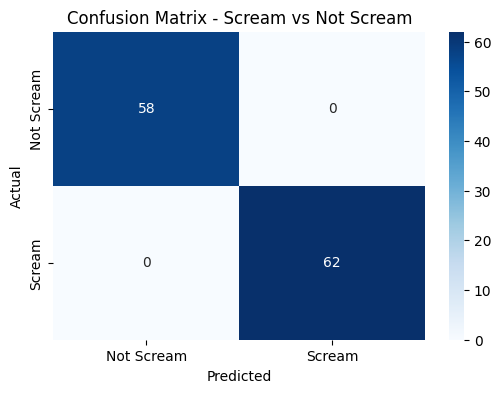

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\abhis\AppData\Local\Temp\ipykernel_13232\3366926861.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred_rf1, palette="Set2")
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


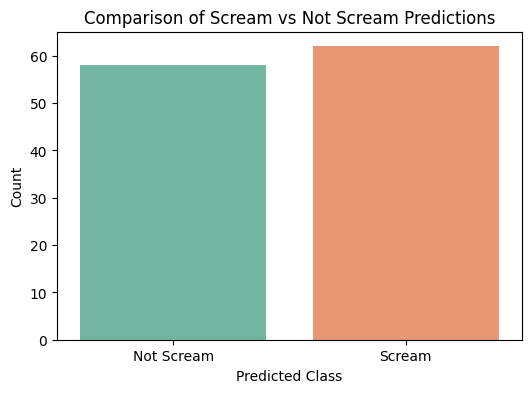

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf1)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Scream", "Scream"], yticklabels=["Not Scream", "Scream"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Scream vs Not Scream")
plt.show()

# Bar plot for comparison between "Scream" and "Not Scream"
plt.figure(figsize=(6, 4))
sns.countplot(x=y_pred_rf1, palette="Set2")
plt.title("Comparison of Scream vs Not Scream Predictions")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Scream', 'Scream'])
plt.show()


In [40]:
import joblib
model_path = 'random_forest_model1.pkl'
joblib.dump(rf1, model_path)
print(f"Model saved to {model_path}")


NameError: name 'rf1' is not defined

In [39]:
# from sklearn.svm import SVC

# # Initialize the model
# svm1 = SVC(kernel='linear', random_state=42)

# # Train the model
# svm1.fit(X_train, y_train)

# # Predict on the test data
# y_pred_svm1 = svm1.predict(X_test)

# # Evaluate the model
# print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm1))
# print("Classification Report:/n", classification_report(y_test, y_pred_svm1))


SVM Accuracy: 0.725
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.58      0.67        19
           1       0.69      0.86      0.77        21

    accuracy                           0.73        40
   macro avg       0.74      0.72      0.72        40
weighted avg       0.74      0.72      0.72        40



In [1]:
import joblib

# Save the model to a file
joblib.dump(model_path, 'arpit_random_forest_model.pkl')

# To load the model later
loaded_model = joblib.load('arpit_random_forest_model.pkl')


NameError: name 'model_path' is not defined

In [1]:
import joblib

# Load the trained model
model1 = joblib.load('arpit_random_forest_model.pkl')

# # Check the number of features the model expects
# n_features = model1.n_features_in_
# print(f"Model expects {n_features} features.")

In [16]:
import os
import numpy as np
import pandas as pd
import librosa
import parselmouth
from scipy.stats import entropy
from librosa.feature import spectral_contrast
import joblib
from sklearn.metrics import accuracy_score




def extract_features(file_name):
    try:
        audio, sr = librosa.load(file_name, sr=None)

        # Fundamental Frequency (F0)
        # f0, voiced_flag, _ = librosa.pyin(audio, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
        # avg_f0 = np.mean(f0[voiced_flag]) if len(f0[voiced_flag]) > 0 else 0

        # RMS Energy
        rms = librosa.feature.rms(y=audio)
        avg_rms = np.mean(rms)

        # MFCCs
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        avg_mfccs = np.mean(mfccs, axis=1)

        # Spectral Centroid
        spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
        avg_spectral_centroid = np.mean(spectral_centroid)

        # Spectral Bandwidth
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
        avg_spectral_bandwidth = np.mean(spectral_bandwidth)

        # Spectral Flatness
        spectral_flatness = librosa.feature.spectral_flatness(y=audio)
        avg_spectral_flatness = np.mean(spectral_flatness)

        # Zero-Crossing Rate
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)
        avg_zero_crossing_rate = np.mean(zero_crossing_rate)

        # Harmonics-to-Noise Ratio (HNR)
        # snd = parselmouth.Sound(file_name)
        # hnr = snd.to_harmonicity()
        # avg_hnr = hnr.values.mean()

        # Chroma Features
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
        avg_chroma = np.mean(chroma, axis=1)

        # Spectral Entropy
        # S = np.abs(librosa.stft(audio))
        # S_sum = np.sum(S, axis=0)
        # S_sum[S_sum == 0] = np.finfo(float).eps
        # S_norm = S / S_sum
        # spectral_entropy = entropy(S_norm, axis=0)
        # avg_entropy = np.mean(spectral_entropy)

        # Spectral Contrast
        spectral_contrasts = spectral_contrast(y=audio, sr=sr)
        avg_spectral_contrast = np.mean(spectral_contrasts, axis=1)

        # Mel-Frequency Spectrogram (Melspectrogram)
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=40)
        avg_mel_spectrogram = np.mean(mel_spectrogram, axis=1)

        # Combine features into a single array
        features = np.concatenate((
            [avg_rms, avg_spectral_centroid, avg_spectral_bandwidth, avg_spectral_flatness, avg_zero_crossing_rate],
            avg_mfccs,
            avg_chroma,
            avg_spectral_contrast,
            avg_mel_spectrogram
        ))

        # Replace NaNs with zero
        features = np.nan_to_num(features)

        return features

    except Exception as e:
        print(f"Error processing {file_name}: {e}")
        return None


# Function to process a folder and extract features from all audio files
def process_folder(folder_path, label):
    features_list = []
    labels_list = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(('.wav', '.mp3')):  # Adjust file extensions if needed
            file_path = os.path.join(folder_path, file_name)
            features = extract_features(file_path)
            if features is not None:
                features_list.append(features)
                labels_list.append(label)
    
    return features_list, labels_list

# Load the pre-trained model
model = joblib.load('C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/models/arpit_random_forest_model.pkl')  # Ensure the path to your model is correct

# Test folders
scream_test_folder = 'C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/Screaming'  # Replace with your actual test folder paths
not_scream_test_folder = 'C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/NotScreaming'
    
# Process the test folders and extract features
scream_test_features, scream_test_labels = process_folder(scream_test_folder, 1)
not_scream_test_features, not_scream_test_labels = process_folder(not_scream_test_folder, 0)

# Combine test features and labels
all_test_features = np.array(scream_test_features + not_scream_test_features)
all_test_labels = np.array(scream_test_labels + not_scream_test_labels)

# Make predictions using the loaded model
predictions = model.predict(all_test_features)
 
# Calculate accuracy
accuracy = accuracy_score(all_test_labels, predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

c:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Test Accuracy: 80.73%


c:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Test Accuracy: 80.73%


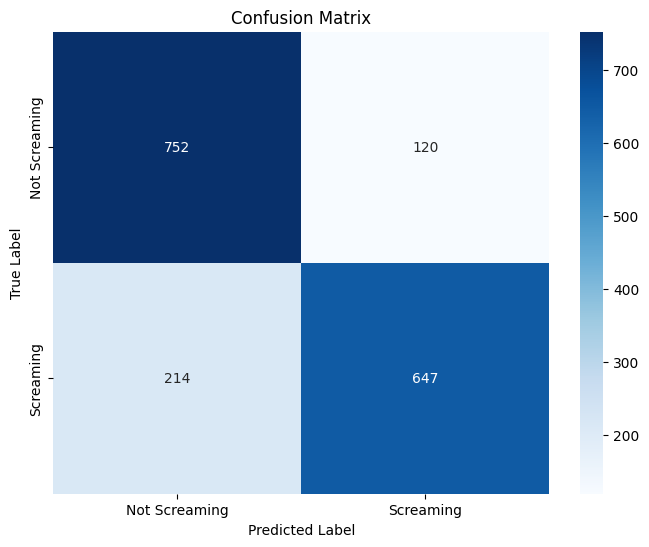

In [1]:
import os
import numpy as np
import librosa
import parselmouth
from scipy.stats import entropy
from librosa.feature import spectral_contrast
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract features from an audio file
def extract_features(file_name):
    try:
        audio, sr = librosa.load(file_name, sr=None)

        # RMS Energy
        rms = librosa.feature.rms(y=audio)
        avg_rms = np.mean(rms)

        # MFCCs
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        avg_mfccs = np.mean(mfccs, axis=1)

        # Spectral Centroid
        spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
        avg_spectral_centroid = np.mean(spectral_centroid)

        # Spectral Bandwidth
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
        avg_spectral_bandwidth = np.mean(spectral_bandwidth)

        # Spectral Flatness
        spectral_flatness = librosa.feature.spectral_flatness(y=audio)
        avg_spectral_flatness = np.mean(spectral_flatness)

        # Zero-Crossing Rate
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)
        avg_zero_crossing_rate = np.mean(zero_crossing_rate)

        # Chroma Features
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
        avg_chroma = np.mean(chroma, axis=1)

        # Spectral Contrast
        spectral_contrasts = spectral_contrast(y=audio, sr=sr)
        avg_spectral_contrast = np.mean(spectral_contrasts, axis=1)

        # Mel-Frequency Spectrogram (Melspectrogram)
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=40)
        avg_mel_spectrogram = np.mean(mel_spectrogram, axis=1)

        # Combine features into a single array
        features = np.concatenate((
            [avg_rms, avg_spectral_centroid, avg_spectral_bandwidth, avg_spectral_flatness, avg_zero_crossing_rate],
            avg_mfccs,
            avg_chroma,
            avg_spectral_contrast,
            avg_mel_spectrogram
        ))

        # Replace NaNs with zero
        features = np.nan_to_num(features)

        return features

    except Exception as e:
        print(f"Error processing {file_name}: {e}")
        return None

# Function to process a folder and extract features from all audio files
def process_folder(folder_path, label):
    features_list = []
    labels_list = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(('.wav', '.mp3')):  # Adjust file extensions if needed
            file_path = os.path.join(folder_path, file_name)
            features = extract_features(file_path)
            if features is not None:
                features_list.append(features)
                labels_list.append(label)
    
    return features_list, labels_list

# Load the pre-trained model
model = joblib.load('C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/models/arpit_random_forest_model.pkl')  # Ensure the path to your model is correct

# Test folders
scream_test_folder = 'C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/Screaming'  # Replace with your actual test folder paths
not_scream_test_folder = 'C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/NotScreaming'
    
# Process the test folders and extract features
scream_test_features, scream_test_labels = process_folder(scream_test_folder, 1)
not_scream_test_features, not_scream_test_labels = process_folder(not_scream_test_folder, 0)

# Combine test features and labels
all_test_features = np.array(scream_test_features + not_scream_test_features)
all_test_labels = np.array(scream_test_labels + not_scream_test_labels)

# Make predictions using the loaded model
predictions = model.predict(all_test_features)

# Calculate accuracy
accuracy = accuracy_score(all_test_labels, predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Compute confusion matrix
conf_matrix = confusion_matrix(all_test_labels, predictions)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Screaming', 'Screaming'], yticklabels=['Not Screaming', 'Screaming'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


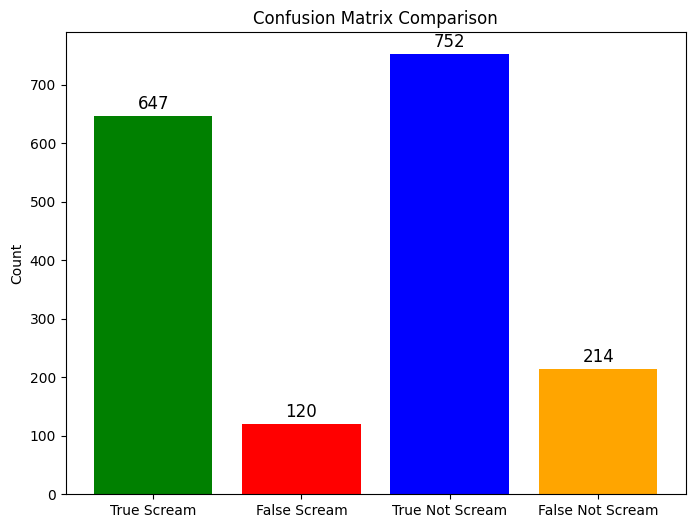

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'conf_matrix' is already calculated using confusion_matrix() as in the previous code
# Extracting values from the confusion matrix
TN = conf_matrix[0, 0]  # True Negative: Predicted "Not Scream" and actually "Not Scream"
FP = conf_matrix[0, 1]  # False Positive: Predicted "Scream" but actually "Not Scream"
FN = conf_matrix[1, 0]  # False Negative: Predicted "Not Scream" but actually "Scream"
TP = conf_matrix[1, 1]  # True Positive: Predicted "Scream" and actually "Scream"

# Create a list of values for the bar chart
categories = ['True Scream', 'False Scream', 'True Not Scream', 'False Not Scream']
values = [TP, FP, TN, FN]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=['green', 'red', 'blue', 'orange'])

# Adding the value labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             f'{bar.get_height()}', ha='center', va='bottom', fontsize=12)

# Adding labels and title
plt.ylabel('Count')
plt.title('Confusion Matrix Comparison')
plt.show()


In [52]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.
# all_test_features = imputer.fit_transform(all_test_features)


In [55]:
# print("Features shape:", all_test_features.shape)
# print("Labels shape:", all_test_labels.shape)


Features shape: (4, 80)
Labels shape: (4,)


In [1]:
# !pip install praat-parselmouth


In [5]:
# !pip install parselmouth

In [16]:
import os
import numpy as np
import librosa
import parselmouth
from scipy.stats import entropy
from librosa.feature import spectral_contrast
import joblib
from sklearn.metrics import accuracy_score

def extract_features(file_name):
    try:
        audio, sr = librosa.load(file_name, sr=None)

        # Fundamental Frequency (F0)
        # f0, voiced_flag, _ = librosa.pyin(audio, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
        # avg_f0 = np.mean(f0[voiced_flag]) if len(f0[voiced_flag]) > 0 else 0

        # RMS Energy
        rms = librosa.feature.rms(y=audio)
        avg_rms = np.mean(rms)

        # MFCCs
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        avg_mfccs = np.mean(mfccs, axis=1)

        # Spectral Centroid
        spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
        avg_spectral_centroid = np.mean(spectral_centroid)

        # Spectral Bandwidth
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
        avg_spectral_bandwidth = np.mean(spectral_bandwidth)

        # Spectral Flatness
        spectral_flatness = librosa.feature.spectral_flatness(y=audio)
        avg_spectral_flatness = np.mean(spectral_flatness)

        # Zero-Crossing Rate
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)
        avg_zero_crossing_rate = np.mean(zero_crossing_rate)

        # Harmonics-to-Noise Ratio (HNR)
        # snd = parselmouth.Sound(file_name)
        # hnr = snd.to_harmonicity()
        # avg_hnr = hnr.values.mean()

        # Chroma Features
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
        avg_chroma = np.mean(chroma, axis=1)

        # Spectral Entropy
        # S = np.abs(librosa.stft(audio))
        # S_sum = np.sum(S, axis=0)
        # S_sum[S_sum == 0] = np.finfo(float).eps
        # S_norm = S / S_sum
        # spectral_entropy = entropy(S_norm, axis=0)
        # avg_entropy = np.mean(spectral_entropy)

        # Spectral Contrast
        spectral_contrasts = spectral_contrast(y=audio, sr=sr)
        avg_spectral_contrast = np.mean(spectral_contrasts, axis=1)

        # Mel-Frequency Spectrogram (Melspectrogram)
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=40)
        avg_mel_spectrogram = np.mean(mel_spectrogram, axis=1)

        # Combine features into a single array
        features = np.concatenate((
            [avg_rms, avg_spectral_centroid, avg_spectral_bandwidth, avg_spectral_flatness, avg_zero_crossing_rate],
            avg_mfccs,
            avg_chroma,
            avg_spectral_contrast,
            avg_mel_spectrogram
        ))

        # Replace NaNs with zero
        features = np.nan_to_num(features)
        print(features)

        return features

    except Exception as e:
        print(f"Error processing {file_name}: {e}")
        return None

# Function to process a single file
def process_file(file_path, label):
    features = extract_features(file_path)
    if features is not None:
        return features, label
    else:
        return None, None

# Load the pre-trained model
model = joblib.load('arpit_random_forest_model.pkl')  # Ensure the path to your model is correct

# Path to the test file
test_file_path = 'C:/Users/abhis/Downloads/SCREAM_DETECTION/screamwp.mp3'  # Replace with your actual file path

# Process the single test file
test_features, test_label = process_file(test_file_path, 1)  # Change label to 0 if it's not screaming

if test_features is not None:
    # Make prediction using the loaded model
    prediction = model.predict([test_features])  # Note the list around test_features
    
    # Print the prediction
    print(f"Predicted class: {prediction[0]}")

    # Calculate accuracy (if you have ground truth label for comparison)
    # accuracy = accuracy_score([test_label], prediction)
    # print(f"Test Accuracy: {accuracy * 100:.2f}%")
else:
    print("Failed to extract features from the test file.")


C:\Users\abhis\AppData\Local\Temp\ipykernel_9696\2734682463.py:13: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_np, _ = librosa.load(file_path, sr=RATE, mono=True)
c:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
ERROR:root:Error extracting features: 


Failed to extract features from the test file.


In [62]:
# !pip install sounddevice numpy scipy scikit-learn librosa



In [18]:
# import pyaudio
# import numpy as np
# import joblib  # For Random Forest model
# import librosa
# from scipy.stats import entropy
# from librosa.feature import spectral_contrast
# import logging

# # Setup logging
# logging.basicConfig(level=logging.INFO)

# # Load your trained model
# model = joblib.load('arpit_random_forest_model.pkl')

# # PyAudio configuration
# FORMAT = pyaudio.paInt16
# CHANNELS = 1
# RATE = 22050
# CHUNK = RATE  # 1 second of audio
# SILENCE_THRESHOLD = 0.01
# FEATURES_LENGTH = 77  # Ensure this matches the length used during training

# def extract_features(audio_np):
#     """Extract features from audio data."""
#     try:
#         if np.max(np.abs(audio_np)) < SILENCE_THRESHOLD:
#             logging.info("Silence detected, skipping feature extraction.")
#             return None
        
#         # Normalize audio data
#         # audio_np = audio_np / np.max(np.abs(audio_np)) if np.max(np.abs(audio_np)) > 0 else audio_np
        
#         # Extract features
#         # Fundamental Frequency (F0)
#         # f0, voiced_flag, _ = librosa.pyin(audio_np, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
#         # avg_f0 = np.mean(f0[voiced_flag]) if len(f0[voiced_flag]) > 0 else 0
#         # logging.info(f"Average F0: {avg_f0}")

#         # RMS Energy
#         rms = librosa.feature.rms(y=audio_np)
#         avg_rms = np.mean(rms)
#         logging.info(f"Average RMS: {avg_rms}")

#         # MFCCs
#         mfccs = librosa.feature.mfcc(y=audio_np, sr=RATE, n_mfcc=13)
#         avg_mfccs = np.mean(mfccs, axis=1)
#         logging.info(f"MFCCs: {avg_mfccs}")

#         # Spectral Centroid
#         spectral_centroid = librosa.feature.spectral_centroid(y=audio_np, sr=RATE)
#         avg_spectral_centroid = np.mean(spectral_centroid)
#         logging.info(f"Spectral Centroid: {avg_spectral_centroid}")

#         # Spectral Bandwidth
#         spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_np, sr=RATE)
#         avg_spectral_bandwidth = np.mean(spectral_bandwidth)
#         logging.info(f"Spectral Bandwidth: {avg_spectral_bandwidth}")

#         # Spectral Flatness
#         spectral_flatness = librosa.feature.spectral_flatness(y=audio_np)
#         avg_spectral_flatness = np.mean(spectral_flatness)
#         logging.info(f"Spectral Flatness: {avg_spectral_flatness}")

#         # Zero-Crossing Rate
#         zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_np)
#         avg_zero_crossing_rate = np.mean(zero_crossing_rate)
#         logging.info(f"Zero-Crossing Rate: {avg_zero_crossing_rate}")

#         # Harmonics-to-Noise Ratio (HNR)
#         # hnr = librosa.effects.harmonic(audio_np)
#         # avg_hnr = np.mean(hnr) if len(hnr) > 0 else 0
#         # logging.info(f"Average HNR: {avg_hnr}")

#         # Chroma Features
#         chroma = librosa.feature.chroma_stft(y=audio_np, sr=RATE)
#         avg_chroma = np.mean(chroma, axis=1)
#         logging.info(f"Chroma Features: {avg_chroma}")

#         # Spectral Entropy
#         # S = np.abs(librosa.stft(audio_np))
#         # S_sum = np.sum(S, axis=0)
#         # S_sum[S_sum == 0] = np.finfo(float).eps
#         # S_norm = S / S_sum
#         # spectral_entropy = entropy(S_norm, axis=0)
#         # avg_entropy = np.mean(spectral_entropy)
#         # logging.info(f"Spectral Entropy: {avg_entropy}")

#         # Spectral Contrast
#         spectral_contrasts = spectral_contrast(y=audio_np, sr=RATE)
#         avg_spectral_contrast = np.mean(spectral_contrasts, axis=1)
#         logging.info(f"Spectral Contrast: {avg_spectral_contrast}")

#         # Mel-Frequency Spectrogram (Melspectrogram)
#         mel_spectrogram = librosa.feature.melspectrogram(y=audio_np, sr=RATE, n_mels=40)
#         avg_mel_spectrogram = np.mean(mel_spectrogram, axis=1)
#         logging.info(f"Mel Spectrogram: {avg_mel_spectrogram}")

#         # Combine all features into a single vector
#         features = np.concatenate((
#             [ avg_rms, avg_spectral_centroid, avg_spectral_bandwidth, avg_spectral_flatness, avg_zero_crossing_rate],
#             avg_mfccs,
#             avg_chroma,
#             avg_spectral_contrast,
#             avg_mel_spectrogram
#         ))

#         # Check if feature length matches
#         if len(features) != FEATURES_LENGTH:
#             logging.error(f"Feature length mismatch: Expected {FEATURES_LENGTH}, got {len(features)}")
#             return None
        
#         logging.info(f"Extracted Features: {features}")
#         return features
#     except Exception as e:
#         logging.error(f"Error extracting features: {e}")
#         return None

# def predict_audio(data):
#     """Process audio data and make a prediction."""
#     audio_np = np.frombuffer(data, dtype=np.int16).astype(np.float32)
    
#     # Extract features
#     features = extract_features(audio_np)
    
#     if features is None:
#         return False
    
#     # Make prediction
#     prediction = model.predict([features])
#     logging.info(f"Prediction: {prediction[0]}")
    
#     return prediction[0] == 1

# def print_feature_summary(features):
#     """Print summary statistics of the features."""
#     logging.info(f"Average F0: {features[0]}")
#     logging.info(f"Average RMS: {features[1]}")
#     logging.info(f"MFCCs: {features[2:15]}")
#     logging.info(f"Spectral Centroid: {features[15]}")
#     logging.info(f"Spectral Bandwidth: {features[16]}")
#     logging.info(f"Spectral Flatness: {features[17]}")
#     logging.info(f"Zero-Crossing Rate: {features[18]}")
#     logging.info(f"Average HNR: {features[19]}")
#     logging.info(f"Chroma Features: {features[20:32]}")
#     logging.info(f"Spectral Entropy: {features[32]}")
#     logging.info(f"Spectral Contrast: {features[33:40]}")
#     logging.info(f"Mel Spectrogram: {features[40:]}")

# # Initialize PyAudio
# p = pyaudio.PyAudio()
# stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)

# logging.info("Listening...")

# try:
#     while True:
#         data = stream.read(CHUNK, exception_on_overflow=False)
#         scream_detected = predict_audio(data)
        
#         if scream_detected:
#             logging.info("Scream detected!")
#             break
#         else:
#             logging.info("No scream detected")

# except KeyboardInterrupt:
#     logging.info("Interrupted manually.") 

# finally:
#     stream.stop_stream()
#     stream.close()
#     p.terminate()


INFO:root:Listening...
INFO:root:Average RMS: 59.34640121459961
INFO:root:MFCCs: [251.8694    100.95708    26.338184    4.2148256  11.839146    7.0265627
  -6.2451553  -5.9800334 -11.078597   -5.3100667  -6.5622287  -6.378094
  -7.4210477]
INFO:root:Spectral Centroid: 2610.5953230244936
INFO:root:Spectral Bandwidth: 2280.3845841934963
INFO:root:Spectral Flatness: 0.1889975517988205
INFO:root:Zero-Crossing Rate: 0.09110884232954546
INFO:root:Chroma Features: [0.46439573 0.52562356 0.57431036 0.65879995 0.63139117 0.4307771
 0.3079343  0.27904016 0.28757125 0.32967448 0.38224974 0.45873687]
INFO:root:Spectral Contrast: [22.08691779 15.78263302 17.97119333 15.40971445 16.38428005 13.48839957
 14.60270962]
INFO:root:Mel Spectrogram: [1.4993500e+07 4.7744924e+07 4.0992375e+06 7.2817725e+06 1.3869488e+06
 3.8194928e+06 1.6846620e+06 2.6312012e+05 3.5396359e+05 3.1944238e+05
 4.7477097e+05 1.8996686e+05 7.6784055e+04 1.3131558e+05 8.4707742e+04
 2.3978870e+05 1.0977425e+05 2.9484439e+04 5.917

In [20]:
# import pyaudio
# import numpy as np
# import joblib
# import librosa
# from scipy.stats import entropy
# from librosa.feature import spectral_contrast
# import logging
# import os
# import wave
# import time

# # Setup logging
# logging.basicConfig(level=logging.INFO)

# # Load your trained model
# model = joblib.load('arpit_random_forest_model.pkl')

# # PyAudio configuration
# FORMAT = pyaudio.paInt16
# CHANNELS = 1
# RATE = 22050
# CHUNK = RATE * 3  # 3 seconds of audio
# SILENCE_THRESHOLD = 0.13
# FEATURES_LENGTH = 77  # Ensure this matches the length used during training

# # Directory to save audio chunks
# OUTPUT_DIR = 'audio_chunks'
# if not os.path.exists(OUTPUT_DIR):
#     os.makedirs(OUTPUT_DIR)

# def extract_features(audio_np):
#     """Extract features from audio data."""
#     try:
#         if np.max(np.abs(audio_np)) < SILENCE_THRESHOLD:
#             logging.info("Silence detected, skipping feature extraction.")
#             return None
        
#         # Normalize audio data
#         audio_np = audio_np / np.max(np.abs(audio_np)) if np.max(np.abs(audio_np)) > 0 else audio_np
        
#         # Extract features
#         # Fundamental Frequency (F0)
#         # f0, voiced_flag, _ = librosa.pyin(audio_np, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
#         # avg_f0 = np.mean(f0[voiced_flag]) if len(f0[voiced_flag]) > 0 else 0
#         # logging.info(f"Average F0: {avg_f0}")

#         # RMS Energy
#         rms = librosa.feature.rms(y=audio_np)
#         avg_rms = np.mean(rms)
#         logging.info(f"Average RMS: {avg_rms}")

#         # MFCCs
#         mfccs = librosa.feature.mfcc(y=audio_np, sr=RATE, n_mfcc=13)
#         avg_mfccs = np.mean(mfccs, axis=1)
#         logging.info(f"MFCCs: {avg_mfccs}")

#         # Spectral Centroid
#         spectral_centroid = librosa.feature.spectral_centroid(y=audio_np, sr=RATE)
#         avg_spectral_centroid = np.mean(spectral_centroid)
#         logging.info(f"Spectral Centroid: {avg_spectral_centroid}")

#         # Spectral Bandwidth
#         spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_np, sr=RATE)
#         avg_spectral_bandwidth = np.mean(spectral_bandwidth)
#         logging.info(f"Spectral Bandwidth: {avg_spectral_bandwidth}")

#         # Spectral Flatness
#         spectral_flatness = librosa.feature.spectral_flatness(y=audio_np)
#         avg_spectral_flatness = np.mean(spectral_flatness)
#         logging.info(f"Spectral Flatness: {avg_spectral_flatness}")

#         # Zero-Crossing Rate
#         zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_np)
#         avg_zero_crossing_rate = np.mean(zero_crossing_rate)
#         logging.info(f"Zero-Crossing Rate: {avg_zero_crossing_rate}")

#         # Harmonics-to-Noise Ratio (HNR)
#         # hnr = librosa.effects.harmonic(audio_np)
#         # avg_hnr = np.mean(hnr) if len(hnr) > 0 else 0
#         # logging.info(f"Average HNR: {avg_hnr}")

#         # Chroma Features
#         chroma = librosa.feature.chroma_stft(y=audio_np, sr=RATE)
#         avg_chroma = np.mean(chroma, axis=1)
#         logging.info(f"Chroma Features: {avg_chroma}")

#         # Spectral Entropy
#         # S = np.abs(librosa.stft(audio_np))
#         # S_sum = np.sum(S, axis=0)
#         # S_sum[S_sum == 0] = np.finfo(float).eps
#         # S_norm = S / S_sum
#         # spectral_entropy = entropy(S_norm, axis=0)
#         # avg_entropy = np.mean(spectral_entropy)
#         # logging.info(f"Spectral Entropy: {avg_entropy}")

#         # Spectral Contrast
#         spectral_contrasts = spectral_contrast(y=audio_np, sr=RATE)
#         avg_spectral_contrast = np.mean(spectral_contrasts, axis=1)
#         logging.info(f"Spectral Contrast: {avg_spectral_contrast}")

#         # Mel-Frequency Spectrogram (Melspectrogram)
#         mel_spectrogram = librosa.feature.melspectrogram(y=audio_np, sr=RATE, n_mels=40)
#         avg_mel_spectrogram = np.mean(mel_spectrogram, axis=1)
#         logging.info(f"Mel Spectrogram: {avg_mel_spectrogram}")

#         # Combine all features into a single vector
#         features = np.concatenate((
#             [avg_rms, avg_spectral_centroid, avg_spectral_bandwidth, avg_spectral_flatness, avg_zero_crossing_rate],
#             avg_mfccs,
#             avg_chroma,
#             avg_spectral_contrast,
#             avg_mel_spectrogram
#         ))

#         # Check if feature length matches
#         if len(features) != FEATURES_LENGTH:
#             logging.error(f"Feature length mismatch: Expected {FEATURES_LENGTH}, got {len(features)}")
#             return None
        
#         logging.info(f"Extracted Features: {features}")
#         return features
#     except Exception as e:
#         logging.error(f"Error extracting features: {e}")
#         return None

# def predict_audio(data):
#     """Process audio data and make a prediction."""
#     audio_np = np.frombuffer(data, dtype=np.int16).astype(np.float32)
    
#     # Extract features
#     features = extract_features(audio_np)
    
#     if features is None:
#         return False
    
#     # Make prediction
#     prediction = model.predict([features])
#     logging.info(f"Prediction: {prediction[0]}")
    
#     return prediction[0] == 1

# def save_chunk_to_wav(chunk_data, chunk_num):
#     """Save audio chunk to a WAV file."""
#     file_path = os.path.join(OUTPUT_DIR, f'chunk_{chunk_num}.wav')
    
#     with wave.open(file_path, 'wb') as wf:
#         wf.setnchannels(CHANNELS)
#         wf.setsampwidth(pyaudio.PyAudio().get_sample_size(FORMAT))
#         wf.setframerate(RATE)
#         wf.writeframes(chunk_data)
    
#     logging.info(f"Saved chunk to {file_path}")

# # Initialize PyAudio
# p = pyaudio.PyAudio()
# stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)

# logging.info("Listening...")

# chunk_number = 0
# scream_detected = False

# try:
#     while True:
#         data = stream.read(CHUNK, exception_on_overflow=False)
#         save_chunk_to_wav(data, chunk_number)
#         chunk_number += 1
        
#         scream_detected = predict_audio(data)
        
#         if scream_detected:
#             logging.info("Scream detected!")
#             # Save the last chunk again after detection
#             save_chunk_to_wav(data, chunk_number)
#             time.sleep(5)  # Wait for 5 seconds before stopping
#             break
#         else:
#             logging.info("No scream detected")

# except KeyboardInterrupt:
#     logging.info("Interrupted manually.") 

# finally:
#     stream.stop_stream()
#     stream.close()
#     p.terminate()


INFO:root:Listening...
INFO:root:Saved chunk to audio_chunks\chunk_0.wav
INFO:root:Average RMS: 325.2043151855469
INFO:root:MFCCs: [478.34283    74.94992     3.3086932  24.67313     7.9529862  -2.8074167
 -15.409924  -12.2838545 -16.412535  -12.059171  -15.318471  -10.657771
  -8.910236 ]
INFO:root:Spectral Centroid: 2189.288890413201
INFO:root:Spectral Bandwidth: 1966.3020648596955
INFO:root:Spectral Flatness: 0.11145918071269989
INFO:root:Zero-Crossing Rate: 0.09370492788461539
INFO:root:Chroma Features: [0.34553155 0.45188808 0.46057793 0.4416274  0.47732463 0.5058572
 0.38190833 0.3948221  0.38610086 0.3112119  0.26780406 0.28095815]
INFO:root:Spectral Contrast: [24.71906979 17.11887421 19.67194077 16.76107311 17.99977207 18.11386413
 19.81701629]
INFO:root:Mel Spectrogram: [2.51022180e+07 4.48465984e+08 2.33187856e+08 3.30563200e+08
 1.76038067e+09 1.20218344e+08 3.27094400e+07 1.60736800e+07
 1.83917288e+06 1.98843900e+06 3.06879844e+05 5.39038250e+05
 1.07079688e+06 1.43111862e+

In [1]:
import pyaudio
import numpy as np
import joblib
import librosa
from librosa.feature import spectral_contrast
import logging
import os
import wave
import time

# Setup logging
logging.basicConfig(level=logging.INFO)

# Load your trained model
model = joblib.load('final_random_forest_model.pkl')

# PyAudio configuration
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 22050
CHUNK = RATE * 3  # 3 seconds of audio
SILENCE_THRESHOLD = 0.9

FEATURES_LENGTH = 77  # Ensure this matches the length used during training

# Directory to save audio chunks
OUTPUT_DIR = 'audio_chunks1'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

def extract_features(file_path):
    """Extract features from audio file."""
    try:
        audio_np, _ = librosa.load(file_path, sr=RATE, mono=True)
        
        if np.max(np.abs(audio_np)) < SILENCE_THRESHOLD:
            logging.info("Silence detected, skipping feature extraction.")
            return None
        
        # Extract features
        # RMS Energy
        rms = librosa.feature.rms(y=audio_np)
        avg_rms = np.mean(rms)
        logging.info(f"Average RMS: {avg_rms}")

        # MFCCs
        mfccs = librosa.feature.mfcc(y=audio_np, sr=RATE, n_mfcc=13)
        avg_mfccs = np.mean(mfccs, axis=1)
        logging.info(f"MFCCs: {avg_mfccs}")

        # Spectral Centroid
        spectral_centroid = librosa.feature.spectral_centroid(y=audio_np, sr=RATE)
        avg_spectral_centroid = np.mean(spectral_centroid)
        logging.info(f"Spectral Centroid: {avg_spectral_centroid}")

        # Spectral Bandwidth
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_np, sr=RATE)
        avg_spectral_bandwidth = np.mean(spectral_bandwidth)
        logging.info(f"Spectral Bandwidth: {avg_spectral_bandwidth}")

        # Spectral Flatness
        spectral_flatness = librosa.feature.spectral_flatness(y=audio_np)
        avg_spectral_flatness = np.mean(spectral_flatness)
        logging.info(f"Spectral Flatness: {avg_spectral_flatness}")

        # Zero-Crossing Rate
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_np)
        avg_zero_crossing_rate = np.mean(zero_crossing_rate)
        logging.info(f"Zero-Crossing Rate: {avg_zero_crossing_rate}")

        # Chroma Features
        chroma = librosa.feature.chroma_stft(y=audio_np, sr=RATE)
        avg_chroma = np.mean(chroma, axis=1)
        logging.info(f"Chroma Features: {avg_chroma}")

        # Spectral Contrast
        spectral_contrasts = spectral_contrast(y=audio_np, sr=RATE)
        avg_spectral_contrast = np.mean(spectral_contrasts, axis=1)
        logging.info(f"Spectral Contrast: {avg_spectral_contrast}")

        # Mel-Frequency Spectrogram (Melspectrogram)
        mel_spectrogram = librosa.feature.melspectrogram(y=audio_np, sr=RATE, n_mels=40)
        avg_mel_spectrogram = np.mean(mel_spectrogram, axis=1)
        logging.info(f"Mel Spectrogram: {avg_mel_spectrogram}")

        # Combine all features into a single vector
        features = np.concatenate((
            [avg_rms, avg_spectral_centroid, avg_spectral_bandwidth, avg_spectral_flatness, avg_zero_crossing_rate],
            avg_mfccs,
            avg_chroma,
            avg_spectral_contrast,
            avg_mel_spectrogram
        ))

        # Check if feature length matches
        if len(features) != FEATURES_LENGTH:
            logging.error(f"Feature length mismatch: Expected {FEATURES_LENGTH}, got {len(features)}")
            return None
        
        logging.info(f"Extracted Features: {features}")
        return features
    except Exception as e:
        logging.error(f"Error extracting features: {e}")
        return None

def predict_audio(file_path):
    """Predict audio from a saved file."""
    # Extract features
    features = extract_features(file_path)
    
    if features is None:
        return False
    
    # Make prediction
    prediction = model.predict([features])
    logging.info(f"Prediction: {prediction[0]}")
    
    return prediction[0] == 1

def save_chunk_to_wav(chunk_data, chunk_num):
    """Save audio chunk to a WAV file."""
    file_path = os.path.join(OUTPUT_DIR, f'chunk_{chunk_num}.wav')
    
    with wave.open(file_path, 'wb') as wf:
        wf.setnchannels(CHANNELS)
        wf.setsampwidth(pyaudio.PyAudio().get_sample_size(FORMAT))
        wf.setframerate(RATE)
        wf.writeframes(chunk_data)
    
    logging.info(f"Saved chunk to {file_path}")
    return file_path

# Initialize PyAudio
p = pyaudio.PyAudio()
stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)

logging.info("Listening...")

chunk_number = 0
scream_detected = False

try:
    while True:
        data = stream.read(CHUNK, exception_on_overflow=False)
        
        # Save the chunk to a WAV file
        file_path = save_chunk_to_wav(data, chunk_number)
        chunk_number += 1
        
        # Predict using the saved audio file
        scream_detected = predict_audio(file_path)
        
        if scream_detected:
            logging.info("Scream detected!")
            # Save the last chunk again after detection
            save_chunk_to_wav(data, chunk_number)
            time.sleep(5)  # Wait for 5 seconds before stopping
            break
        else:
            logging.info("No scream detected")
            

except KeyboardInterrupt:
    logging.info("Interrupted manually.") 

finally:
    stream.stop_stream()
    stream.close()
    p.terminate()


FileNotFoundError: [Errno 2] No such file or directory: 'final_random_forest_model.pkl'

In [26]:
import numpy as np
import joblib


# Get the number of features the model was trained on
model = joblib.load('C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/models/arpit_random_forest_model.pkl')

num_features = model.n_features_in_  # For sklearn models like RandomForestClassifier
print(f"The model was trained on {num_features} features.")

The model was trained on 77 features.


In [14]:
import pyaudio
import numpy as np
import joblib
import librosa
from librosa.feature import spectral_contrast
import logging
import os
import wave
import time

# Setup logging
logging.basicConfig(level=logging.INFO)

# Load your trained model
model = joblib.load('C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/models/arpit_random_forest_model.pkl')

# PyAudio configuration
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 22050
CHUNK = RATE * 3  # 3 seconds of audio
SILENCE_THRESHOLD = 0.9
FEATURES_LENGTH = 77  # Ensure this matches the length used during training

# Directory to save audio chunks
OUTPUT_DIR = 'audio_chunks1'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

def extract_features(file_path):
    """Extract features from audio file."""
    try:
        # Load the audio file using librosa (supports MP3, WAV, etc.)
        audio_np, _ = librosa.load(file_path, sr=RATE, mono=True)
        
        # Check if the audio is silent (below the threshold)
        if np.max(np.abs(audio_np)) < SILENCE_THRESHOLD:
            logging.info("Silence detected, skipping feature extraction.")
            return None
        
        # Extract features
        # RMS Energy
        rms = librosa.feature.rms(y=audio_np)
        
        avg_rms = np.mean(rms)
        logging.info(f"Average RMS: {avg_rms}")

        # MFCCs
        mfccs = librosa.feature.mfcc(y=audio_np, sr=RATE, n_mfcc=13)
        avg_mfccs = np.mean(mfccs, axis=1)
        logging.info(f"MFCCs: {avg_mfccs}")

        # Spectral Centroid
        spectral_centroid = librosa.feature.spectral_centroid(y=audio_np, sr=RATE)
        avg_spectral_centroid = np.mean(spectral_centroid)
        logging.info(f"Spectral Centroid: {avg_spectral_centroid}")

        # Spectral Bandwidth
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_np, sr=RATE)
        avg_spectral_bandwidth = np.mean(spectral_bandwidth)
        logging.info(f"Spectral Bandwidth: {avg_spectral_bandwidth}")

        # Spectral Flatness
        spectral_flatness = librosa.feature.spectral_flatness(y=audio_np)
        avg_spectral_flatness = np.mean(spectral_flatness)
        logging.info(f"Spectral Flatness: {avg_spectral_flatness}")

        # Zero-Crossing Rate
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_np)
        avg_zero_crossing_rate = np.mean(zero_crossing_rate)
        logging.info(f"Zero-Crossing Rate: {avg_zero_crossing_rate}")

        # Chroma Features
        chroma = librosa.feature.chroma_stft(y=audio_np, sr=RATE)
        avg_chroma = np.mean(chroma, axis=1)
        logging.info(f"Chroma Features: {avg_chroma}")

        # Spectral Contrast
        spectral_contrasts = spectral_contrast(y=audio_np, sr=RATE)
        avg_spectral_contrast = np.mean(spectral_contrasts, axis=1)
        logging.info(f"Spectral Contrast: {avg_spectral_contrast}")

        # Mel-Frequency Spectrogram (Melspectrogram)
        mel_spectrogram = librosa.feature.melspectrogram(y=audio_np, sr=RATE, n_mels=40)
        avg_mel_spectrogram = np.mean(mel_spectrogram, axis=1)
        logging.info(f"Mel Spectrogram: {avg_mel_spectrogram}")

        # Combine all features into a single vector
        features = np.concatenate((
            [avg_rms, avg_spectral_centroid, avg_spectral_bandwidth, avg_spectral_flatness, avg_zero_crossing_rate],
            avg_mfccs,
            avg_chroma,
            avg_spectral_contrast,
            avg_mel_spectrogram
        ))

        # Check if feature length matches
        if len(features) != FEATURES_LENGTH:
            logging.error(f"Feature length mismatch: Expected {FEATURES_LENGTH}, got {len(features)}")
            return None
        
        logging.info(f"Extracted Features: {features}")
        return features
    except Exception as e:
        logging.error(f"Error extracting features: {e}")
        return None


def predict_audio(file_path):
    """Predict audio from a saved file."""
    # Extract features
    features = extract_features(file_path)
    
    if features is None:
        return False
    
    # Make prediction
    prediction = model.predict([features])
    logging.info(f"Prediction: {prediction[0]}")
    
    return prediction[0] == 1

def save_chunk_to_wav(chunk_data, chunk_num):
    """Save audio chunk to a WAV file."""
    file_path = os.path.join(OUTPUT_DIR, f'chunk_{chunk_num}.wav')
    
    with wave.open(file_path, 'wb') as wf:
        wf.setnchannels(CHANNELS)
        wf.setsampwidth(pyaudio.PyAudio().get_sample_size(FORMAT))
        wf.setframerate(RATE)
        wf.writeframes(chunk_data)
    
    logging.info(f"Saved chunk to {file_path}")
    return file_path

# Initialize PyAudio
p = pyaudio.PyAudio()
stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)

logging.info("Listening...")

chunk_number = 0
scream_detected = False

try:
    while True:
        data = stream.read(CHUNK, exception_on_overflow=False)
        
        # Save the chunk to a WAV file
        file_path = save_chunk_to_wav(data, chunk_number)
        chunk_number += 1
        
        # Predict using the saved audio file
        scream_detected = predict_audio(file_path)
        
        if scream_detected:
            logging.info("Scream detected!")
            # Save the last chunk again after detection
            save_chunk_to_wav(data, chunk_number)
            time.sleep(5)  # Wait for 5 seconds before stopping
            break
        else:
            logging.info("No scream detected")

except KeyboardInterrupt:
    logging.info("Interrupted manually.") 

finally:
    stream.stop_stream()
    stream.close()
    p.terminate()


INFO:root:Listening...
INFO:root:Saved chunk to audio_chunks1\chunk_0.wav
INFO:root:Silence detected, skipping feature extraction.
INFO:root:No scream detected
INFO:root:Saved chunk to audio_chunks1\chunk_1.wav
INFO:root:Silence detected, skipping feature extraction.
INFO:root:No scream detected
INFO:root:Saved chunk to audio_chunks1\chunk_2.wav
INFO:root:Silence detected, skipping feature extraction.
INFO:root:No scream detected
INFO:root:Saved chunk to audio_chunks1\chunk_3.wav
INFO:root:Silence detected, skipping feature extraction.
INFO:root:No scream detected
INFO:root:Saved chunk to audio_chunks1\chunk_4.wav
INFO:root:Silence detected, skipping feature extraction.
INFO:root:No scream detected
INFO:root:Saved chunk to audio_chunks1\chunk_5.wav
INFO:root:Silence detected, skipping feature extraction.
INFO:root:No scream detected
INFO:root:Saved chunk to audio_chunks1\chunk_6.wav
INFO:root:Silence detected, skipping feature extraction.
INFO:root:No scream detected
INFO:root:Saved ch

In [10]:
import numpy as np
import joblib
import librosa
from librosa.feature import spectral_contrast
import logging
import os

# Setup logging
logging.basicConfig(level=logging.INFO)

# Load your trained model
model = joblib.load('C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/models/abhi_random_forest_model.pkl')

# PyAudio configuration
RATE = 22050
SILENCE_THRESHOLD =0.9
FEATURES_LENGTH = 34  # Ensure this matches the length used during training


def extract_features(file_path):
    """Extract 34 features from the audio file."""
    try:
        audio_np, _ = librosa.load(file_path, sr=RATE, mono=True)

        if np.max(np.abs(audio_np)) < SILENCE_THRESHOLD:
            logging.info("Silence detected, skipping feature extraction.")
            return None

        # Extract features
        # Fundamental Frequency (using librosa's pitch estimation)
        pitches, magnitudes = librosa.piptrack(y=audio_np, sr=RATE)
        fundamental_freq = np.mean(pitches[pitches > 0])

        # RMS Energy
        rms = librosa.feature.rms(y=audio_np)
        avg_rms = np.mean(rms)

        # Spectral Centroid
        spectral_centroid = librosa.feature.spectral_centroid(y=audio_np, sr=RATE)
        avg_spectral_centroid = np.mean(spectral_centroid)

        # Spectral Bandwidth
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_np, sr=RATE)
        avg_spectral_bandwidth = np.mean(spectral_bandwidth)

        # Spectral Flatness
        spectral_flatness = librosa.feature.spectral_flatness(y=audio_np)
        avg_spectral_flatness = np.mean(spectral_flatness)

        # Zero-Crossing Rate
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_np)
        avg_zero_crossing_rate = np.mean(zero_crossing_rate)

        # Formant 1 (assuming you calculate it separately or use a library for formants)
        formant_1 = np.mean(librosa.feature.spectral_centroid(y=audio_np, sr=RATE))  # Placeholder for actual Formant calculation

        # Harmonics-to-Noise Ratio (HNR)
        hnr = np.mean(librosa.effects.harmonic(audio_np))

        # Entropy of the Audio Signal
        entropy = -np.sum((audio_np ** 2) * np.log(audio_np ** 2 + 1e-12)) / len(audio_np)

        # MFCCs
        mfccs = librosa.feature.mfcc(y=audio_np, sr=RATE, n_mfcc=13)
        avg_mfccs = np.mean(mfccs, axis=1)

        # Chroma Features
        chroma = librosa.feature.chroma_stft(y=audio_np, sr=RATE)
        avg_chroma = np.mean(chroma, axis=1)

        # Combine all 34 features into a single vector
        features = np.concatenate((
            [fundamental_freq, avg_rms, avg_spectral_centroid, avg_spectral_bandwidth, avg_spectral_flatness, avg_zero_crossing_rate, formant_1, hnr, entropy],
            avg_mfccs,
            avg_chroma
        ))

        # Check if feature length matches
        if len(features) != FEATURES_LENGTH:
            logging.error(f"Feature length mismatch: Expected {FEATURES_LENGTH}, got {len(features)}")
            return None

        logging.info(f"Extracted Features: {features}")
        return features
    except Exception as e:
        logging.error(f"Error extracting features: {e}")
        return None


def predict_audio(file_path):
    """Predict whether the audio contains a scream based on the saved file."""
    # Extract features from the input audio file
    features = extract_features(file_path)
    
    if features is None:
        return False
    
    # Make prediction using the pre-trained model
    prediction = model.predict([features])
    logging.info(f"Prediction: {prediction[0]}")
    
    return prediction[0] == 1
def save_chunk_to_wav(chunk_data, chunk_num):
    """Save audio chunk to a WAV file."""
    file_path = os.path.join(OUTPUT_DIR, f'chunk_{chunk_num}.wav')
    
    with wave.open(file_path, 'wb') as wf:
        wf.setnchannels(CHANNELS)
        wf.setsampwidth(pyaudio.PyAudio().get_sample_size(FORMAT))
        wf.setframerate(RATE)
        wf.writeframes(chunk_data)
    
    logging.info(f"Saved chunk to {file_path}")
    return file_path

# Initialize PyAudio
p = pyaudio.PyAudio()
stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)

logging.info("Listening...")

chunk_number = 0
scream_detected = False

try:
    while True:
        data = stream.read(CHUNK, exception_on_overflow=False)
        
        # Save the chunk to a WAV file
        file_path = save_chunk_to_wav(data, chunk_number)
        chunk_number += 1
        
        # Predict using the saved audio file
        scream_detected = predict_audio(file_path)
        
        if scream_detected:
            logging.info("Scream detected!")
            # Save the last chunk again after detection
            save_chunk_to_wav(data, chunk_number)
            time.sleep(5)  # Wait for 5 seconds before stopping
            break
        else:
            logging.info("No scream detected")

except KeyboardInterrupt:
    logging.info("Interrupted manually.") 

finally:
    stream.stop_stream()
    stream.close()
    p.terminate()


INFO:root:Listening...
INFO:root:Saved chunk to audio_chunks1\chunk_0.wav
INFO:root:Silence detected, skipping feature extraction.
INFO:root:No scream detected
INFO:root:Saved chunk to audio_chunks1\chunk_1.wav
INFO:root:Extracted Features: [ 8.03030884e+02  1.68235227e-01  1.84321030e+03  2.33244751e+03
  4.30035591e-03  5.83120493e-02  1.84321030e+03 -4.00130666e-05
  8.23290019e-02 -1.69088684e+02  9.73779755e+01  9.36719120e-01
  2.58848896e+01  8.55325031e+00 -4.37433720e+00  2.10076690e+00
 -1.99823608e+01 -2.99001861e+00 -4.26766485e-01 -1.43889351e+01
  5.26915979e+00 -3.42207384e+00  3.19926478e-02  7.65792131e-02
  1.15190618e-01  5.63555658e-02  1.56973720e-01  2.09634691e-01
  1.99772716e-01  3.29724252e-01  3.97784412e-01  6.25871003e-01
  4.09119219e-01  9.47602168e-02]
c:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  wa

In [7]:
import numpy as np
import joblib
import librosa
from librosa.feature import spectral_contrast
import logging
import os

# Setup logging
logging.basicConfig(level=logging.INFO)

# Load your trained model
model = joblib.load('C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/models/arpit_random_forest_model.pkl')

# PyAudio configuration
RATE = 22050
SILENCE_THRESHOLD =0
FEATURES_LENGTH = 77  # Ensure this matches the length used during training

def extract_features(file_path):
    """Extract features from audio file."""
    try:
        # Load the audio file using librosa (supports MP3, WAV, etc.)
        audio_np, _ = librosa.load(file_path, sr=RATE, mono=True)
        
        # Check if the audio is silent (below the threshold)
        if np.max(np.abs(audio_np)) < SILENCE_THRESHOLD:
            logging.info("Silence detected, skipping feature extraction.")
            return None
        
        # Extract features
        # RMS Energy
        rms = librosa.feature.rms(y=audio_np)
        
        avg_rms = np.mean(rms)
        logging.info(f"Average RMS: {avg_rms}")

        # MFCCs
        mfccs = librosa.feature.mfcc(y=audio_np, sr=RATE, n_mfcc=13)
        avg_mfccs = np.mean(mfccs, axis=1)
        logging.info(f"MFCCs: {avg_mfccs}")

        # Spectral Centroid
        spectral_centroid = librosa.feature.spectral_centroid(y=audio_np, sr=RATE)
        avg_spectral_centroid = np.mean(spectral_centroid)
        logging.info(f"Spectral Centroid: {avg_spectral_centroid}")

        # Spectral Bandwidth
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_np, sr=RATE)
        avg_spectral_bandwidth = np.mean(spectral_bandwidth)
        logging.info(f"Spectral Bandwidth: {avg_spectral_bandwidth}")

        # Spectral Flatness
        spectral_flatness = librosa.feature.spectral_flatness(y=audio_np)
        avg_spectral_flatness = np.mean(spectral_flatness)
        logging.info(f"Spectral Flatness: {avg_spectral_flatness}")

        # Zero-Crossing Rate
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_np)
        avg_zero_crossing_rate = np.mean(zero_crossing_rate)
        logging.info(f"Zero-Crossing Rate: {avg_zero_crossing_rate}")

        # Chroma Features
        chroma = librosa.feature.chroma_stft(y=audio_np, sr=RATE)
        avg_chroma = np.mean(chroma, axis=1)
        logging.info(f"Chroma Features: {avg_chroma}")

        # Spectral Contrast
        spectral_contrasts = spectral_contrast(y=audio_np, sr=RATE)
        avg_spectral_contrast = np.mean(spectral_contrasts, axis=1)
        logging.info(f"Spectral Contrast: {avg_spectral_contrast}")

        # Mel-Frequency Spectrogram (Melspectrogram)
        mel_spectrogram = librosa.feature.melspectrogram(y=audio_np, sr=RATE, n_mels=40)
        avg_mel_spectrogram = np.mean(mel_spectrogram, axis=1)
        logging.info(f"Mel Spectrogram: {avg_mel_spectrogram}")

        # Combine all features into a single vector
        features = np.concatenate((
            [avg_rms, avg_spectral_centroid, avg_spectral_bandwidth, avg_spectral_flatness, avg_zero_crossing_rate],
            avg_mfccs,
            avg_chroma,
            avg_spectral_contrast,
            avg_mel_spectrogram
        ))

        # Check if feature length matches
        if len(features) != FEATURES_LENGTH:
            logging.error(f"Feature length mismatch: Expected {FEATURES_LENGTH}, got {len(features)}")
            return None
        
        logging.info(f"Extracted Features: {features}")
        return features
    except Exception as e:
        logging.error(f"Error extracting features: {e}")
        return None

def predict_audio(file_path):
    """Predict whether the audio contains a scream based on the saved file."""
    # Extract features from the input audio file
    features = extract_features(file_path)
    
    if features is None:
        return False
    
    # Make prediction using the pre-trained model
    prediction = model.predict([features])
    logging.info(f"Prediction: {prediction[0]}")
    
    return prediction[0] == 1

if __name__ == "__main__":
    # Example usage: Pass a file path (MP3 or WAV) to the script for prediction
    file_path = 'C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/audio_chunks1'  # Replace with your audio file path
    
    # Predict whether scream is detected
    scream_detected = predict_audio(file_path)
    
    if scream_detected:
        logging.info("Scream detected in the audio!")
    else:
        logging.info("No scream detected in the audio.")


C:\Users\abhis\AppData\Local\Temp\ipykernel_40520\2216078719.py:23: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_np, _ = librosa.load(file_path, sr=RATE, mono=True)
ERROR:root:Error extracting features: [Errno 13] Permission denied: 'C:/Users/abhis/Downloads/DraupadiAI/SCREAM_DETECTION/audio_chunks1'
INFO:root:No scream detected in the audio.


In [1]:
import os
import numpy as np
import pandas as pd
import librosa

# Configuration
RATE = 22050  # Sample rate for librosa
FEATURES_LENGTH = 77  # Expected feature length

def extract_features(file_path):
    """Extract features from audio file."""
    try:
        audio_np, _ = librosa.load(file_path, sr=RATE, mono=True)

        # Extract features
        # RMS Energy
        rms = librosa.feature.rms(y=audio_np)
        avg_rms = np.mean(rms)

        # MFCCs
        mfccs = librosa.feature.mfcc(y=audio_np, sr=RATE, n_mfcc=13)
        avg_mfccs = np.mean(mfccs, axis=1)

        # Spectral Centroid
        spectral_centroid = librosa.feature.spectral_centroid(y=audio_np, sr=RATE)
        avg_spectral_centroid = np.mean(spectral_centroid)

        # Spectral Bandwidth
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio_np, sr=RATE)
        avg_spectral_bandwidth = np.mean(spectral_bandwidth)

        # Spectral Flatness
        spectral_flatness = librosa.feature.spectral_flatness(y=audio_np)
        avg_spectral_flatness = np.mean(spectral_flatness)

        # Zero-Crossing Rate
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_np)
        avg_zero_crossing_rate = np.mean(zero_crossing_rate)

        # Chroma Features
        chroma = librosa.feature.chroma_stft(y=audio_np, sr=RATE)
        avg_chroma = np.mean(chroma, axis=1)

        # Spectral Contrast
        spectral_contrasts = librosa.feature.spectral_contrast(y=audio_np, sr=RATE)
        avg_spectral_contrast = np.mean(spectral_contrasts, axis=1)

        # Mel-Frequency Spectrogram (Melspectrogram)
        mel_spectrogram = librosa.feature.melspectrogram(y=audio_np, sr=RATE, n_mels=40)
        avg_mel_spectrogram = np.mean(mel_spectrogram, axis=1)

        # Combine all features into a single vector
        features = np.concatenate((
            [avg_rms, avg_spectral_centroid, avg_spectral_bandwidth, avg_spectral_flatness, avg_zero_crossing_rate],
            avg_mfccs,
            avg_chroma,
            avg_spectral_contrast,
            avg_mel_spectrogram
        ))

        # Check if feature length matches
        if len(features) != FEATURES_LENGTH:
            return None

        return features

    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None


def process_audio_files(folder_path, label):
    """Process all audio files in the given folder and return extracted features with labels."""
    data = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        features = extract_features(file_path)
        if features is not None:
            data.append(np.append(features, label))
    return data


def save_features_to_csv(scream_folder, non_scream_folder, output_csv):
    # Extract features and labels for each folder
    scream_data = process_audio_files(scream_folder, label=1)  # Screaming files labeled as 1
    non_scream_data = process_audio_files(non_scream_folder, label=0)  # Non-screaming files labeled as 0

    # Combine data
    combined_data = scream_data + non_scream_data

    # Define column names for the CSV
    column_names = [f"feature_{i+1}" for i in range(FEATURES_LENGTH)] + ["label"]

    # Create DataFrame
    df = pd.DataFrame(combined_data, columns=column_names)

    # Save to CSV
    df.to_csv(output_csv, index=False)
    print(f"Features and labels saved to {output_csv}")


# Example usage
scream_folder = 'Screaming'
non_scream_folder = 'Not_Screaming'
output_csv = 'extracted_audio_features.csv'

save_features_to_csv(scream_folder, non_scream_folder, output_csv)


C:\Users\abhis\AppData\Local\Temp\ipykernel_20756\152315218.py:13: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_np, _ = librosa.load(file_path, sr=RATE, mono=True)
c:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error extracting features from Screaming\scream.wav: 
Features and labels saved to extracted_audio_features.csv
